# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


    100% |████████████████████████████████| 993kB 20.8MB/s 


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


## 1.1 Reading Data

In [0]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx/view?usp=sharing
file_id = '1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('train_data.csv')

In [0]:
project_data = pd.read_csv('train_data.csv')


In [0]:
project_data.shape
#project_data = project_data.sample(frac = 0.5)

(109248, 17)

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#https://drive.google.com/file/d/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe/view?usp=sharing
file_id = '14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('resources.csv')

In [0]:
resource_data = pd.read_csv('resources.csv')
#resource_data = resource_data.sample(frac = 0.5)


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:06<00:00, 1651.66it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 34230.13it/s]


## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

#2. Support vector Machines

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


In [0]:
from sklearn.model_selection import train_test_split
#splitting categorical data
# clean_categories
X = project_data
Y = project_data['project_is_approved']
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 0 ,stratify = Y)
X_train_cv, X_test_cv,Y_train_cv, Y_test_cv  = train_test_split(X_train,Y_train,test_size = 0.25,random_state = 0)



In [0]:
X_train['price']

25553       67.35
55121      451.20
5818        75.17
2306       109.98
107707     281.96
88887      104.10
71004       71.78
80894      192.84
104158     124.97
18135       81.45
46490       10.58
88222      143.15
85316      453.00
39315      283.22
42467     1699.99
5887        99.99
53494      367.99
57526      571.77
36877      446.27
87621      716.65
14085       16.47
76039       75.97
103066     727.65
89304     1362.98
69906      380.00
107864    1166.96
86233       39.30
31482      166.51
42230      462.26
34796      243.00
           ...   
65882      659.00
42935      144.37
35095      348.97
10119       13.60
91463      189.77
61728      271.60
70841      137.32
32798      223.99
33693      147.53
30966      596.14
1702        93.90
44479      587.41
61540      109.80
63121      159.91
1404       224.98
8276         7.89
24445     1462.50
80569      242.99
48028      223.96
98682      217.54
10443      321.93
26073      179.99
42610      335.50
88115       19.98
16253     

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
#categories
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict), lowercase=False, binary=True)
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'])

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

categories_one_hot_te = vectorizer.transform(X_test['clean_categories'])
print("Shape of matrix after one hot encodig ",categories_one_hot_te.shape)


categories_one_hot_tecv = vectorizer.transform(X_test_cv['clean_categories'])
print("Shape of matrix after one hot encodig ",categories_one_hot_tecv.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (73196, 9)
Shape of matrix after one hot encodig  (36052, 9)
Shape of matrix after one hot encodig  (18299, 9)


In [0]:
#subcategories
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'])
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

sub_categories_one_hot_te = vectorizer.transform(X_test['clean_subcategories'])
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_te.shape)

sub_categories_one_hot_tecv = vectorizer.transform(X_test_cv['clean_subcategories'])
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_tecv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (73196, 30)
Shape of matrix after one hot encodig  (36052, 30)
Shape of matrix after one hot encodig  (18299, 30)


In [0]:
from collections import Counter
my_counter = Counter()
for word in X_train['school_state'].values:
    if not isinstance(word, float):
      word = word.replace('.',' ')
      my_counter.update(word.split())
       
sorted_school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(sorted_school_state_dict.items(), key=lambda kv: kv[1]))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)

print(vectorizer.get_feature_names())


school_state_one_hot = vectorizer.transform(X_train['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)


school_state_one_hot_te = vectorizer.transform(X_test['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot_te.shape)

school_state_one_hot_tecv = vectorizer.transform(X_test_cv['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot_tecv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NE', 'SD', 'DE', 'AK', 'NH', 'ME', 'WV', 'HI', 'DC', 'NM', 'IA', 'KS', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'OK', 'NJ', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (73196, 51)
Shape of matrix after one hot encodig  (36052, 51)
Shape of matrix after one hot encodig  (18299, 51)


In [0]:
from collections import Counter
my_counter = Counter()
for word in X_train['teacher_prefix'].values:
    if not isinstance(word, float):
      word = word.replace('.',' ')
      my_counter.update(word.split())
       
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [0]:
##Vectorizing teacher_prefix
# we use count vectorizer to convert the values into one hot encoded features
#https://blog.csdn.net/ningzhimeng/article/details/80953916
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].astype('U'))
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

teacher_prefix_one_hot_te = vectorizer.transform(X_test['teacher_prefix'].astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_te.shape)

teacher_prefix_one_hot_tecv = vectorizer.transform(X_test_cv['teacher_prefix'].astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_tecv.shape)




['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encodig  (73196, 5)
Shape of matrix after one hot encodig  (36052, 5)
Shape of matrix after one hot encodig  (18299, 5)


In [0]:
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
   if not isinstance(word, float):
    word = word.replace('Grades',' ')
    my_counter.update(word.split())
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


In [0]:
##Vectorizing project_grade_category
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

project_grade_category_one_hot_te = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_te.shape)

project_grade_category_one_hot_tecv = vectorizer.transform(X_test_cv['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_tecv.shape)


['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encodig  (73196, 4)
Shape of matrix after one hot encodig  (36052, 4)
Shape of matrix after one hot encodig  (18299, 4)


### 1.5.3 Vectorizing Numerical features

In [0]:
#splitting numerical features
X_train_p, X_test_p = train_test_split(project_data['price'].values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_pcv, X_test_pcv = train_test_split(X_train_p,test_size = 0.25,shuffle = False , random_state = 0)

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_p[np.isnan(X_train_p)] = np.median(X_train_p[~np.isnan(X_train_p)])
Normalizer().fit(X_train_p.reshape(-1,1))
price_normalized = Normalizer().transform(X_train_p.reshape(-1,1))

X_test_pcv[np.isnan(X_test_pcv)] = np.median(X_test_pcv[~np.isnan(X_test_pcv)])
price_normalized_tecv= Normalizer().transform(X_test_pcv.reshape(-1,1))

X_test_p[np.isnan(X_test_p)] = np.median(X_test_p[~np.isnan(X_test_p)])
price_normalized_te= Normalizer().transform(X_test_p.reshape(-1,1))

print(price_normalized.shape)

print(price_normalized_tecv.shape)
print(price_normalized_te.shape)





(73196, 1)
(18299, 1)
(36052, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

##Bag of words

### Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_b = CountVectorizer()
text_bow = vectorizer_b.fit(X_train['essay'])
text_bow = vectorizer_b.transform(X_train['essay'])
print("Shape of matrix after one hot encodig ",text_bow.shape)

text_bow_te = vectorizer_b.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_bow_te.shape)

text_bow_tecv = vectorizer_b.transform(X_test_cv['essay'])
print("Shape of matrix after one hot encodig ",text_bow_tecv.shape)

Shape of matrix after one hot encodig  (73196, 51782)
Shape of matrix after one hot encodig  (36052, 51782)
Shape of matrix after one hot encodig  (18299, 51782)


In [0]:
#bow of Project_titles

In [0]:
vectorizer_t = CountVectorizer()
titles_bow = vectorizer_t.fit_transform(X_train['project_title'])
print("Shape of matrix after one hot encodig ",titles_bow.shape)

titles_bow_te = vectorizer_t.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig ",titles_bow_te.shape)

titles_bow_tecv = vectorizer_t.transform(X_test_cv['project_title'])
print("Shape of matrix after one hot encodig ",titles_bow_tecv.shape)


Shape of matrix after one hot encodig  (73196, 14525)
Shape of matrix after one hot encodig  (36052, 14525)
Shape of matrix after one hot encodig  (18299, 14525)


### combining data


In [0]:
%time
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,project_grade_category_one_hot,text_bow,titles_bow,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train.shape

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 19.6 µs


(73196, 66407)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,school_state_one_hot_te,project_grade_category_one_hot_te,text_bow_te,titles_bow_te,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test.shape

(36052, 66407)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,text_bow_tecv,titles_bow_tecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_cv.shape

(18299, 66407)

In [0]:
print("Final Data matrix")
print(x_train.shape, Y_train.shape)
print(x_test_cv.shape, Y_test_cv.shape)
print(x_test.shape, Y_test.shape)

Final Data matrix
(73196, 66407) (73196,)
(18299, 66407) (18299,)
(36052, 66407) (36052,)


###Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW )

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection

from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [0]:

x_train.shape

(73196, 66407)

In [0]:
Y_train.shape

(73196,)

###Sgdclassifier  with hinge loss on bow

###Penalty L1

In [0]:
C = [10 ** x for x in range(-4, 4)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 0.0001 cv: 0.7520904930431138 train: 0.7580077886848132
C 0.001 cv: 0.7007537372938731 train: 0.700474839438865
C 0.01 cv: 0.6033453318633465 train: 0.6000485425315042
C 0.1 cv: 0.5809173610060185 train: 0.5795093860905212
C 1 cv: 0.5 train: 0.5
C 10 cv: 0.5 train: 0.5
C 100 cv: 0.5 train: 0.5
C 1000 cv: 0.5 train: 0.5


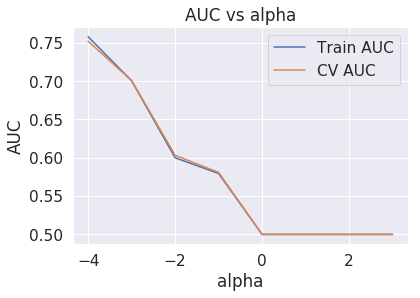

In [0]:
C = [10 ** x for x in range(-4, 4)]
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("AUC vs alpha")
plt.show()

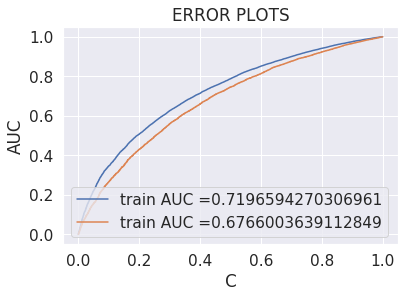

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=0.0005, penalty='l1', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test)[:,1])
y_train_pred_bow =clf_s.predict_proba(x_train)[:,1]
y_test_pred_bow = clf_s.predict_proba(x_test)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

####confusion matrix for test data

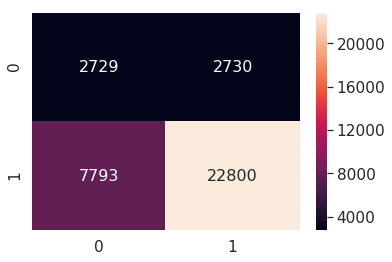

In [0]:
a = confusion_matrix(Y_test, predict(y_test_pred_bow, te_thresholds, test_fpr, test_fpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

 **2729+22800 = 25529 poinst are correctly classified**
**and 7793+2730 =10523  points are wrongly classified**

####confusion matrix for train data

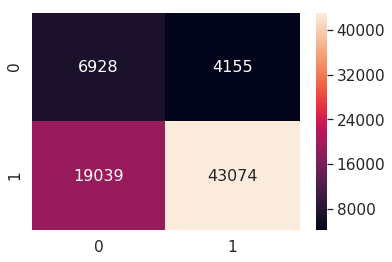

In [0]:
a = confusion_matrix(Y_train, predict(y_train_pred_bow, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **6928+43074 = 50002 pouns are correctly classified**
**and 19039+4155 =14194  points are wrongly classified**

###using l2 penalty

In [0]:
C = [10 ** x for x in range(-8, 2)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.7645529423971362 train: 0.769622954036619
C 1e-07 cv: 0.7605934557002866 train: 0.7640704816360412
C 1e-06 cv: 0.7654263406048976 train: 0.7731069512004183
C 1e-05 cv: 0.7701649654488691 train: 0.7741328077706006
C 0.0001 cv: 0.7748939527305305 train: 0.7796338753435677
C 0.001 cv: 0.7683386708974155 train: 0.7728363390001532
C 0.01 cv: 0.765359794412461 train: 0.7692076145925962
C 0.1 cv: 0.7215222139464552 train: 0.7259500141850276
C 1 cv: 0.661744646063815 train: 0.6643788770455544
C 10 cv: 0.6137818128292314 train: 0.6116659449600477


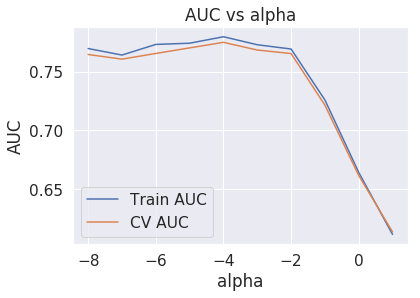

In [0]:
C = [10 ** x for x in range(-8, 2)]
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("AUC vs alpha")
plt.show()

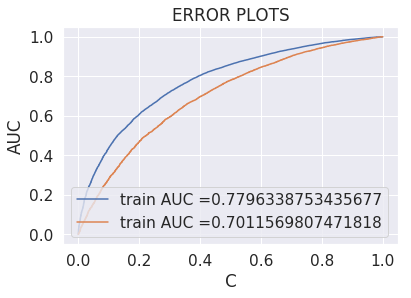

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test)[:,1])
y_train_pred_bow=clf_s.predict_proba(x_train)[:,1]
y_test_pred_bow= clf_s.predict_proba(x_test)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

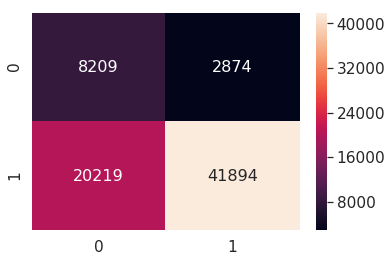

In [0]:
a = confusion_matrix(Y_train, predict(y_train_pred_bow, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

 **8209+41894=50103 poinst are correctly classified**
**and 20219+2874=23093 points are wrongly classified**

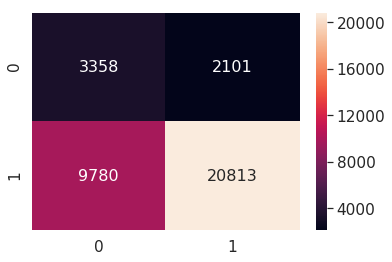

In [0]:
a = confusion_matrix(Y_test, predict(y_test_pred_bow, te_thresholds, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

   **3358+20813=24171 pouns are correctly classified**
**and 9780+2101=11881 points are wrongly classified**

###Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_b = TfidfVectorizer()
text_tfidf = vectorizer_tfidf_b.fit_transform(X_train['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf.shape)
text_tfidf_te = vectorizer_tfidf_b.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_te.shape)
text_tfidf_tecv = vectorizer_tfidf_b.transform(X_test_cv['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_tecv.shape)

Shape of matrix after one hot encodig  (73196, 51782)
Shape of matrix after one hot encodig  (36052, 51782)
Shape of matrix after one hot encodig  (18299, 51782)


In [0]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_t = TfidfVectorizer()
titles_tfidf = vectorizer_tfidf_t.fit_transform(X_train['project_title'])
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

titles_tfidf_te = vectorizer_tfidf_t.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig ",titles_tfidf_te.shape)

titles_tfidf_tecv = vectorizer_tfidf_t.transform(X_test_cv['project_title'])
print("Shape of matrix after one hot encodig ",titles_tfidf_tecv.shape)


Shape of matrix after one hot encodig  (73196, 14525)
Shape of matrix after one hot encodig  (36052, 14525)
Shape of matrix after one hot encodig  (18299, 14525)


### 2.4.1 Combining all features,TFIDF <font color='red'> SET 2</font>

In [0]:
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,project_grade_category_one_hot,text_tfidf,titles_tfidf,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train_tfidf.shape

(73196, 66407)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,school_state_one_hot_te,project_grade_category_one_hot_te,text_tfidf_te,titles_tfidf_te,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test_tfidf.shape

(36052, 66407)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,text_tfidf_tecv,titles_tfidf_tecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_tfidf_cv.shape

(18299, 66407)

In [0]:
print("Final Data matrix")
print(x_train_tfidf.shape, Y_train.shape)
print(x_test_tfidf_cv.shape, Y_test_cv.shape)
print(x_test_tfidf.shape, Y_test.shape)

Final Data matrix
(73196, 66407) (73196,)
(18299, 66407) (18299,)
(36052, 66407) (36052,)


###Sgd classifier with hinge loss on Tfidf

###Using L2 Penalty

In [0]:
C = [10 ** x for x in range(-4, 4)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train_tfidf, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train_tfidf)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_tfidf_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 0.0001 cv: 0.7904866118040205 train: 0.7931256241380545
C 0.001 cv: 0.7152896964257197 train: 0.7150159689728148
C 0.01 cv: 0.5974124837648211 train: 0.5930956019871744
C 0.1 cv: 0.562903405439694 train: 0.5602397605297091
C 1 cv: 0.5628127418352336 train: 0.5601697327645799
C 10 cv: 0.5628140581852075 train: 0.5601696543216294
C 100 cv: 0.5628140581852076 train: 0.5601696906378102
C 1000 cv: 0.5628140581852076 train: 0.5601696906378102


* **Here we took alpha values in the range of 0.0001 to 1000**

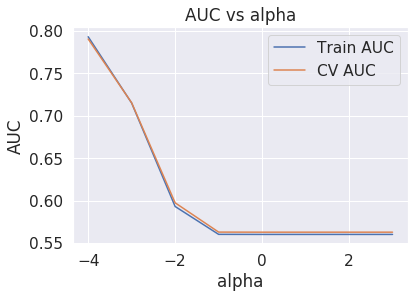

In [0]:
C = [10 ** x for x in range(-4, 4)]
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("AUC vs alpha")
plt.show()


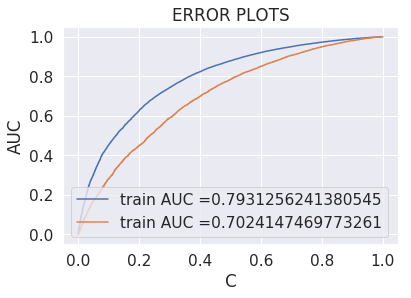

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=1e-04, penalty='l2', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train_tfidf, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_tfidf)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_tfidf)[:,1])
y_train_pred_tfidf = clf_s.predict_proba(x_train_tfidf)[:,1]
y_test_pred_tfidf = clf_s.predict_proba(x_test_tfidf)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

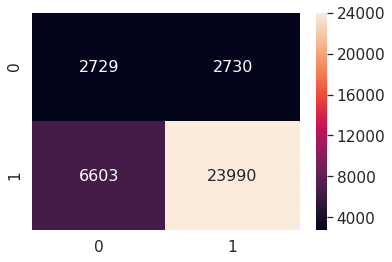

In [0]:
a = confusion_matrix(Y_test, predict(y_test_pred_tfidf, te_thresholds, test_fpr, test_fpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

**2729+23990 = 26719 points are correctly classified**
**and 6603+23990 = 9333 points are wrongly classified**

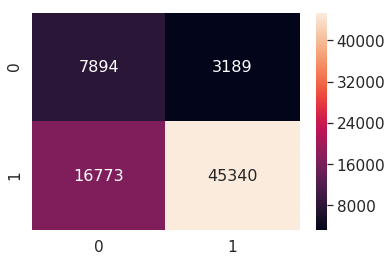

In [0]:
a = confusion_matrix(Y_train, predict(y_train_pred_tfidf, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **7894+45340 = 53234 pouns are correctly classified**
**and 16773+3189 = 19962 points are wrongly classified**

###Using l1 penalty

In [0]:
C = [10 ** x for x in range(-4, 4)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train_tfidf, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train_tfidf)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_tfidf_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 0.0001 cv: 0.7421197531524114 train: 0.7457824722739504
C 0.001 cv: 0.6373697935949137 train: 0.6330341329871144
C 0.01 cv: 0.5442240114552536 train: 0.5413994743006215
C 0.1 cv: 0.5 train: 0.5
C 1 cv: 0.5 train: 0.5
C 10 cv: 0.5 train: 0.5
C 100 cv: 0.5 train: 0.5
C 1000 cv: 0.5 train: 0.5


* **Here we took alpha values in the range of 0.0001 to 1000**

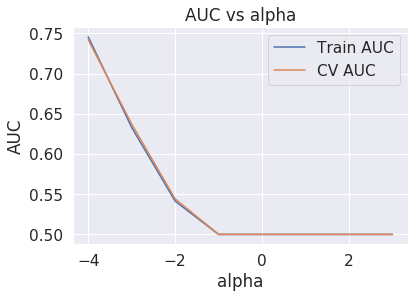

In [0]:
C = [10 ** x for x in range(-4,4)]
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("AUC vs alpha")
plt.show()


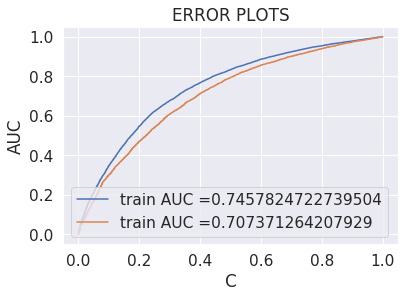

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=1e-04, penalty='l1', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train_tfidf, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_tfidf)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_tfidf)[:,1])
y_train_pred_tfidf = clf_s.predict_proba(x_train_tfidf)[:,1]
y_test_pred_tfidf = clf_s.predict_proba(x_test_tfidf)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

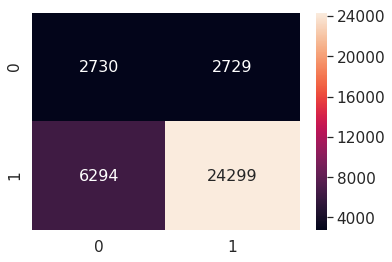

In [0]:
a = confusion_matrix(Y_test, predict(y_test_pred_tfidf, te_thresholds, test_fpr, test_fpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

**2730+24229 =26959 pouns are correctly classified**
**and 6294+2729 =9023  points are wrongly classified**

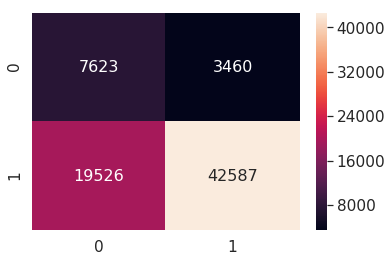

In [0]:
a = confusion_matrix(Y_train, predict(y_train_pred_tfidf, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **7623+42587 = 50210 pouns are correctly classified**
**and 19526+3460 = 22986 points are wrongly classified**

# 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/glove.42B.300d.txt" "glove.42B.300d.txt"

In [0]:
# Reading glove vecors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')



927it [00:00, 9261.55it/s]

Loading Glove Model


329739it [00:35, 9316.09it/s]

Done. 329739  words loaded!


In [0]:
words = []
for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))




all the words in the coupus 473570
the unique words in the coupus 16903
The number of words that are present in both glove vectors and our coupus 14930 ( 88.328 %)
word 2 vec length 14930


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove.42B.300d.txt', 'wb') as f:
    pickle.dump(words_courpus, f)

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove.42B.300d.txt', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 73196/73196 [00:32<00:00, 2263.21it/s]

73196
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_trcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_cv['essay']): # for each review/sentence
    vector_trcv = np.zeros(300) # as word vectors are of zero length
    cnt_words_trcv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_trcv += model[word]
            cnt_words_trcv += 1
    if cnt_words_trcv != 0:
        vector_trcv /= cnt_words_trcv
    avg_w2v_vectors_trcv.append(vector_trcv)

print(len(avg_w2v_vectors_trcv))
print(len(avg_w2v_vectors_trcv[0]))

100%|██████████| 54897/54897 [00:22<00:00, 2408.68it/s]

54897
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['essay']): # for each review/sentence
    vector_tecv = np.zeros(300) # as word vectors are of zero length
    cnt_words_tecv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_tecv += model[word]
            cnt_words_tecv += 1
    if cnt_words_tecv != 0:
        vector_tecv /= cnt_words_tecv
    avg_w2v_vectors_tecv.append(vector_tecv)

print(len(avg_w2v_vectors_tecv))
print(len(avg_w2v_vectors_tecv[0]))

100%|██████████| 18299/18299 [00:07<00:00, 2410.86it/s]

18299
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector_te = np.zeros(300) # as word vectors are of zero length
    cnt_words_te =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_te += model[word]
            cnt_words_te += 1
    if cnt_words_te != 0:
        vector_te /= cnt_words_te
    avg_w2v_vectors_te.append(vector_te)

print(len(avg_w2v_vectors_te))
print(len(avg_w2v_vectors_te[0]))

100%|██████████| 36052/36052 [00:15<00:00, 2397.95it/s]

36052
300


In [0]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector_titles = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles += model[word]
            cnt_words_titles += 1
    if cnt_words_titles != 0:
        vector_titles /= cnt_words_titles
    avg_w2v_vectors_titles.append(vector_titles)

print(len(avg_w2v_vectors_titles))
print(len(avg_w2v_vectors_titles[0]))

100%|██████████| 73196/73196 [00:00<00:00, 120795.04it/s]

73196
300


In [0]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles_trcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_cv['project_title']): # for each review/sentence
    vector_titles_trcv = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles_trcv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles_trcv += model[word]
            cnt_words_titles_trcv += 1
    if cnt_words_titles_trcv != 0:
        vector_titles_trcv /= cnt_words_titles_trcv
    avg_w2v_vectors_titles_trcv.append(vector_titles_trcv)

print(len(avg_w2v_vectors_titles_trcv))
print(len(avg_w2v_vectors_titles_trcv[0]))

100%|██████████| 54897/54897 [00:00<00:00, 123331.36it/s]

54897
300


In [0]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles_tecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['project_title']): # for each review/sentence
    vector_titles_tecv = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles_tecv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles_tecv += model[word]
            cnt_words_titles_tecv += 1
    if cnt_words_titles_tecv != 0:
        vector_titles_tecv /= cnt_words_titles_tecv
    avg_w2v_vectors_titles_tecv.append(vector_titles_tecv)

print(len(avg_w2v_vectors_titles_tecv))
print(len(avg_w2v_vectors_titles_tecv[0]))

100%|██████████| 18299/18299 [00:00<00:00, 123032.43it/s]

18299
300


In [0]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector_titles_te = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles_te =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles_te += model[word]
            cnt_words_titles_te += 1
    if cnt_words_titles_te != 0:
        vector_titles_te /= cnt_words_titles_te
    avg_w2v_vectors_titles_te.append(vector_titles_te)

print(len(avg_w2v_vectors_titles_te))
print(len(avg_w2v_vectors_titles_te[0]))

100%|██████████| 36052/36052 [00:00<00:00, 114377.97it/s]

36052
300


### 2.4.1 Combining all features,<font color='red'>word 2 vec</font>

In [0]:
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_w2v= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,project_grade_category_one_hot,avg_w2v_vectors,avg_w2v_vectors_titles,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train_w2v.shape

(73196, 700)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_w2v= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,school_state_one_hot_te,project_grade_category_one_hot_te,avg_w2v_vectors_te,avg_w2v_vectors_titles_te,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test_w2v.shape

(36052, 700)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_w2v_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,avg_w2v_vectors_tecv,avg_w2v_vectors_titles_tecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_w2v_cv.shape

(18299, 700)

In [0]:
print("Final Data matrix")
print(x_train_w2v.shape, Y_train.shape)
print(x_test_w2v_cv.shape, Y_test_cv.shape)
print(x_test_w2v.shape, Y_test.shape)

Final Data matrix
(73196, 700) (73196,)
(18299, 700) (18299,)
(36052, 700) (36052,)


In [0]:

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection

from sklearn.metrics import precision_recall_curve, auc, roc_curve

###Sgd classifier with Hinge loss on avg w2v

###using L1 penalty

In [0]:
C = [10 ** x for x in range(-8, 2)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train_w2v, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train_w2v)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_w2v_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.660804913219863 train: 0.6599789378644078
C 1e-07 cv: 0.6591640829772489 train: 0.6576783993269688
C 1e-06 cv: 0.6815366731106699 train: 0.6800681252039962
C 1e-05 cv: 0.6959970361440084 train: 0.6938920435778655
C 0.0001 cv: 0.6905476058203166 train: 0.6870619098305576
C 0.001 cv: 0.631223050378735 train: 0.629513777515737
C 0.01 cv: 0.5562014916219731 train: 0.5544675236662636
C 0.1 cv: 0.5 train: 0.5
C 1 cv: 0.5 train: 0.5
C 10 cv: 0.5 train: 0.5


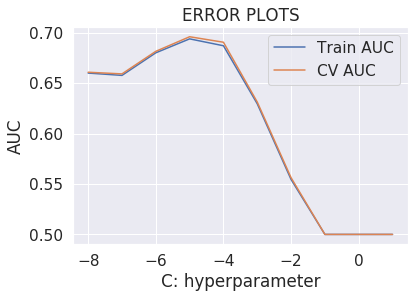

In [0]:
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

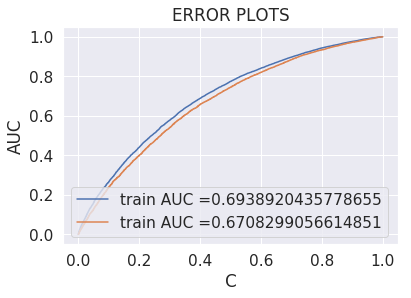

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=1e-05, penalty='l1', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train_w2v, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_w2v)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_w2v)[:,1])
y_pred_train_w2v = clf_s.predict_proba(x_train_w2v)[:,1]
y_pred_test_w2v = clf_s.predict_proba(x_test_w2v)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

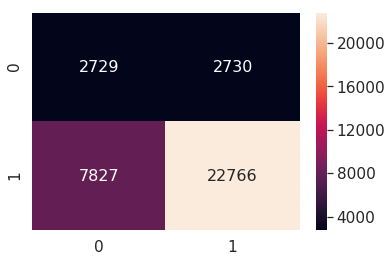

In [0]:
a = confusion_matrix(Y_test, predict(y_pred_test_w2v, te_thresholds, test_fpr, test_fpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

   **2729+22766 =  25495 pouns are correctly classified**
**and 7827+2730 =10557 points are wrongly classified**

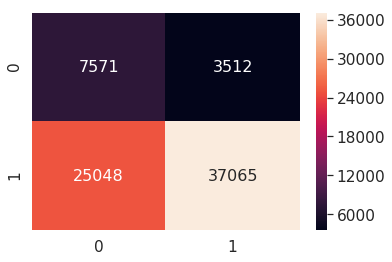

In [0]:
a = confusion_matrix(Y_train, predict(y_pred_train_w2v, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

**7571+37065 = 44636  pouns are correctly classified**
**and 25048+3512 = 28560  points are wrongly classified**

###Using  l2 penalty


In [0]:
C = [10 ** x for x in range(-8, 2)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train_w2v, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train_w2v)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_w2v_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.645643875900354 train: 0.6448523275793479
C 1e-07 cv: 0.6423758490398566 train: 0.6399466870330908
C 1e-06 cv: 0.6455395786711625 train: 0.6418960451968176
C 1e-05 cv: 0.6429615777657958 train: 0.6402730256864826
C 0.0001 cv: 0.6695697590031169 train: 0.6667071684083672
C 0.001 cv: 0.6573825913374112 train: 0.6531151114171929
C 0.01 cv: 0.5993210736959003 train: 0.598421152005647
C 0.1 cv: 0.5490452960257185 train: 0.5515069232898353
C 1 cv: 0.5395075882639689 train: 0.542401500919281
C 10 cv: 0.5393484274483604 train: 0.5422112549744978


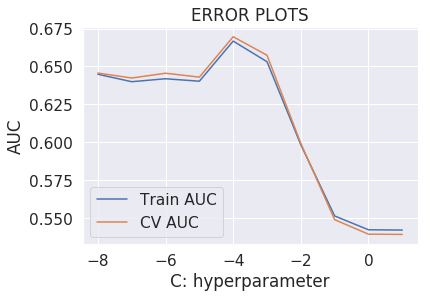

In [0]:
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

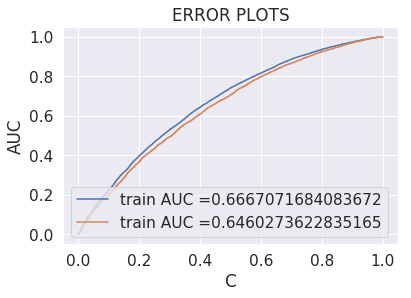

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=1e-04, penalty='l2', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train_w2v, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, thresholds_tr = roc_curve(Y_train, clf_s.predict_proba(x_train_w2v)[:,1])
test_fpr, test_tpr, thresholds_te = roc_curve(Y_test, clf_s.predict_proba(x_test_w2v)[:,1])
y_pred_train_w2v = clf_s.predict_proba(x_train_w2v)[:,1]
y_pred_test_w2v = clf_s.predict_proba(x_test_w2v)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

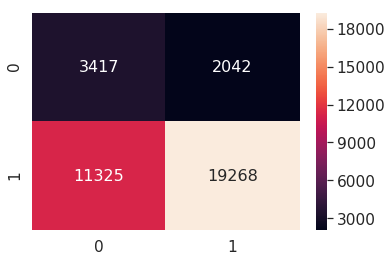

In [0]:
a = confusion_matrix(Y_test, predict(y_pred_test_w2v, thresholds_te, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

   **3417+19268 =22685 pouns are correctly classified**
**and 11325+2042 =13367  points are wrongly classified**

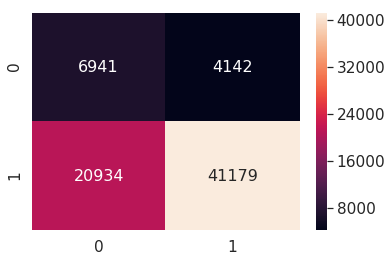

In [0]:
a = confusion_matrix(Y_train, predict(y_pred_train_w2v, thresholds_tr, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

**6941+41179 =48120  pouns are correctly classified**
**and 20934+4142 =25076 points are wrongly classified**

###categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr.append(vector)

print(len(tfidf_w2v_vectors_tr))
print(len(tfidf_w2v_vectors_tr[0]))

100%|██████████| 73196/73196 [04:39<00:00, 262.11it/s]

73196
300


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te.append(vector)

print(len(tfidf_w2v_vectors_te))
print(len(tfidf_w2v_vectors_te[0]))

100%|██████████| 36052/36052 [02:21<00:00, 255.68it/s]

36052
300


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test_cv['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tecv.append(vector)

print(len(tfidf_w2v_vectors_tecv))
print(len(tfidf_w2v_vectors_tecv[0]))

100%|██████████| 18299/18299 [01:10<00:00, 260.23it/s]

18299
300


###project titles

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_ttr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_ttr.append(vector)

print(len(tfidf_w2v_vectors_ttr))
print(len(tfidf_w2v_vectors_ttr[0]))

100%|██████████| 73196/73196 [00:00<00:00, 81485.88it/s]


73196
300


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tte = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tte.append(vector)

print(len(tfidf_w2v_vectors_tte))
print(len(tfidf_w2v_vectors_tte[0]))

100%|██████████| 36052/36052 [00:00<00:00, 73748.14it/s]

36052
300


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test_cv['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_ttecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_ttecv.append(vector)

print(len(tfidf_w2v_vectors_ttecv))
print(len(tfidf_w2v_vectors_ttecv[0]))

100%|██████████| 18299/18299 [00:00<00:00, 73901.91it/s]

18299
300


### 2.4.1 Combining all features,<font color='red'>tfidf word 2 vec</font>

In [0]:
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf_w2v= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,project_grade_category_one_hot,tfidf_w2v_vectors_tr,tfidf_w2v_vectors_ttr,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train_tfidf_w2v.shape

(73196, 700)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf_w2v= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,school_state_one_hot_te,project_grade_category_one_hot_te,tfidf_w2v_vectors_te,tfidf_w2v_vectors_tte,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test_tfidf_w2v.shape

(36052, 700)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf_w2v_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,tfidf_w2v_vectors_tecv,tfidf_w2v_vectors_ttecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_tfidf_w2v_cv.shape

(18299, 700)

In [0]:
print("Final Data matrix")
print(x_train_tfidf_w2v.shape, Y_train.shape)
print(x_test_tfidf_w2v_cv.shape, Y_test_cv.shape)
print(x_test_tfidf_w2v.shape, Y_test.shape)

Final Data matrix
(73196, 700) (73196,)
(18299, 700) (18299,)
(36052, 700) (36052,)


###Sgdclassifier with Hinge loss(Tfidf w2v)

###Using l1 penalty

In [0]:
C = [10 ** x for x in range(-8, 2)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train_tfidf_w2v, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train_tfidf_w2v)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_tfidf_w2v_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.6243315351522564 train: 0.6225153879974492
C 1e-07 cv: 0.6619128097729959 train: 0.6584155582388436
C 1e-06 cv: 0.6706962725058823 train: 0.6628026683659578
C 1e-05 cv: 0.6955146879035288 train: 0.6885388939883021
C 0.0001 cv: 0.6896495025442929 train: 0.6808546901008901
C 0.001 cv: 0.6493634108019397 train: 0.6481321544483184
C 0.01 cv: 0.5531299535013475 train: 0.5522792224645839
C 0.1 cv: 0.5 train: 0.5
C 1 cv: 0.5 train: 0.5
C 10 cv: 0.5 train: 0.5


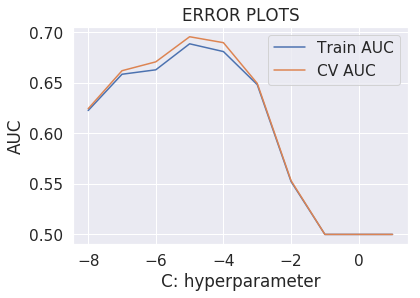

In [0]:
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
#set_xlim = (1e3,1000)
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

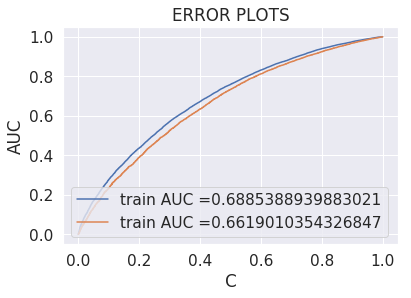

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha = 1e-05, penalty='l1', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train_tfidf_w2v, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_tfidf_w2v)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_tfidf_w2v)[:,1])
y_train_pred_tfidfw2v=clf_s.predict_proba(x_train_tfidf_w2v)[:,1]
y_test_pred_tfidfw2v=clf_s.predict_proba(x_test_tfidf_w2v)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

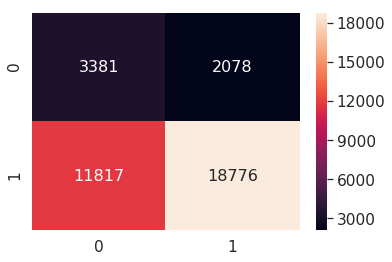

In [0]:
a = confusion_matrix(Y_test, predict(y_test_pred_tfidfw2v, te_thresholds, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

**3381+18776 =22517  pouns are wrongly  classified**
**and 11817+2078 =13895  points arecorrectly  classified**

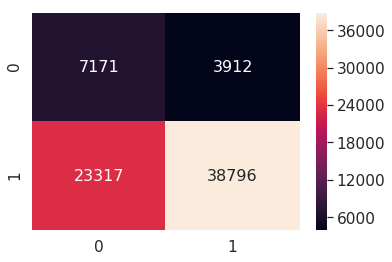

In [0]:
a = confusion_matrix(Y_train, predict(y_train_pred_tfidfw2v, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **7171+38796 = 45967 pouns are correctly classified**
**and 23317+3912 =27229 points are wrongly classified**

###Using l2 penalty

In [0]:
C = [10 ** x for x in range(-8, 2)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train_tfidf_w2v, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train_tfidf_w2v)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_tfidf_w2v_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.604362200465151 train: 0.6012502173541578
C 1e-07 cv: 0.6271177309097637 train: 0.6256345833144387
C 1e-06 cv: 0.6578252375224244 train: 0.6574579760885811
C 1e-05 cv: 0.6630924003872137 train: 0.656014178383183
C 0.0001 cv: 0.6772232293083065 train: 0.670790484240812
C 0.001 cv: 0.6672998545104192 train: 0.6638408557321719
C 0.01 cv: 0.6173679732709496 train: 0.6155468670852289
C 0.1 cv: 0.5541853605992665 train: 0.5546389287764433
C 1 cv: 0.5415605770859482 train: 0.542270902122505
C 10 cv: 0.541452213275587 train: 0.542136934636797


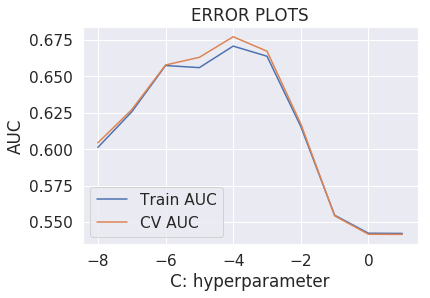

In [0]:
log_a = [math.log10(num) for num in C]
plt.plot(log_a, train_auc, label='Train AUC')
plt.plot(log_a, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
#set_xlim = (1e3,1000)
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

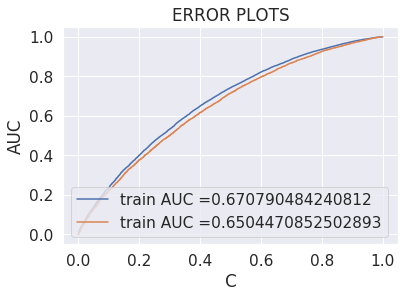

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha = 1e-04, penalty='l2', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train_tfidf_w2v, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_tfidf_w2v)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_tfidf_w2v)[:,1])
y_train_pred_tfidfw2v=clf_s.predict_proba(x_train_tfidf_w2v)[:,1]
y_test_pred_tfidfw2v = clf_s.predict_proba(x_test_tfidf_w2v)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

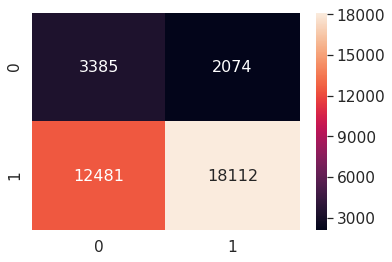

In [0]:
a = confusion_matrix(Y_test, predict(y_test_pred_tfidfw2v, te_thresholds, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

** 3385+18112 =21497 pouns are correctly classified**
**and 12481+2074 =14555 points are wrongly classified**

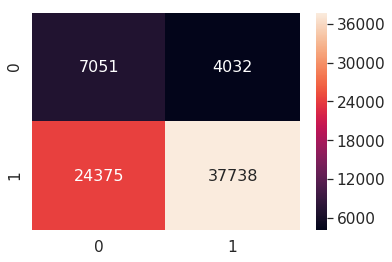

In [0]:
a = confusion_matrix(Y_train, predict(y_train_pred_tfidfw2v, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **7051+37738 = 44789 pouns are correctly classified**
**and 24375+4032   =28407  points are wrongly classified**

# set 5 ( without text)


###sentimental_scores calculation

In [0]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

###calculation for essay and vectorisation

In [0]:
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
sip = SentimentIntensityAnalyzer()
listn = []
data = pd.DataFrame(project_data["essay"])
for index, row in data.iterrows():
  sn = sip.polarity_scores(row["essay"]) ['neg']
  listn.append(sn)
ne = pd.Series(listn)
data['neagtive'] = ne.values
n = pd.DataFrame(data['neagtive'])
display(n.head(10))


neagtive
0     0.008
1     0.037
2     0.058
3     0.052
4     0.016
5     0.077
6     0.028
7     0.019
8     0.007
9     0.051

In [0]:
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
sipp = SentimentIntensityAnalyzer()
listp = []
data = pd.DataFrame(project_data["essay"])
for index, row in data.iterrows():
  snp = sipp.polarity_scores(row["essay"]) ['pos']
  listp.append(snp)
po = pd.Series(listp)
data['positive'] = po.values

In [0]:
p = pd.DataFrame(data['positive'])
display(p.head(10))

positive
0     0.081
1     0.112
2     0.179
3     0.214
4     0.087
5     0.146
6     0.172
7     0.149
8     0.250
9     0.266

In [0]:
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
sip = SentimentIntensityAnalyzer()
listneu = []
data = pd.DataFrame(project_data["essay"])
for index, row in data.iterrows():
  sn = sip.polarity_scores(row["essay"]) ['neu']
  listneu.append(sn)
neu = pd.Series(listneu)
data['neutral'] = neu.values
ne = pd.DataFrame(data['neutral'])
display(ne.head(10))


neutral
0    0.911
1    0.851
2    0.764
3    0.733
4    0.897
5    0.777
6    0.800
7    0.831
8    0.743
9    0.684

In [0]:
#splitting numerical features
from sklearn.model_selection import train_test_split
X_train_p, X_test_p = train_test_split(n.values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_pcv, X_test_pcv = train_test_split(X_train_p,test_size = 0.25,shuffle = False , random_state = 0)


In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_p[np.isnan(X_train_p)] = np.median(X_train_p[~np.isnan(X_train_p)])
Normalizer().fit(X_train_p.reshape(-1,1))
essay_normalized = Normalizer().transform(X_train_p.reshape(-1,1))


X_train_pcv[np.isnan(X_train_pcv)] = np.median(X_train_pcv[~np.isnan(X_train_pcv)])
essay_normalized_cv= Normalizer().transform(X_train_pcv.reshape(-1,1))

X_test_pcv[np.isnan(X_test_pcv)] = np.median(X_test_pcv[~np.isnan(X_test_pcv)])
essay_normalized_tecv= Normalizer().transform(X_test_pcv.reshape(-1,1))

X_test_p[np.isnan(X_test_p)] = np.median(X_test_p[~np.isnan(X_test_p)])
essay_normalized_te= Normalizer().transform(X_test_p.reshape(-1,1))

print(essay_normalized.shape)
print(essay_normalized_cv.shape)
print(essay_normalized_tecv.shape)
print(essay_normalized_te.shape)

(73196, 1)
(54897, 1)
(18299, 1)
(36052, 1)


In [0]:
X_train_tnpp, X_test_tnpp = train_test_split(p.values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_tnppcv, X_test_tnppcv = train_test_split(X_train_tnpp,test_size = 0.25,shuffle = False , random_state = 0)


In [0]:
#teacher_number_of_previously_posted_projects feature 
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_tnpp[np.isnan(X_train_tnpp)] = np.median(X_train_tnpp[~np.isnan(X_train_tnpp)])
Normalizer().fit(X_train_tnpp.reshape(-1,1))
p_normalized_tnpp = Normalizer().transform(X_train_tnpp.reshape(-1,1))


X_train_tnppcv[np.isnan(X_train_tnppcv)] = np.median(X_train_tnppcv[~np.isnan(X_train_tnppcv)])
p_normalized_tnppcv= Normalizer().transform(X_train_tnppcv.reshape(-1,1))

X_test_tnppcv[np.isnan(X_test_tnppcv)] = np.median(X_test_tnppcv[~np.isnan(X_test_tnppcv)])
p_normalized_tnpptecv= Normalizer().transform(X_test_tnppcv.reshape(-1,1))

X_test_p[np.isnan(X_test_tnpp)] = np.median(X_test_tnpp[~np.isnan(X_test_tnpp)])
p_normalized_tnppte= Normalizer().transform(X_test_tnpp.reshape(-1,1))

print(p_normalized_tnpp.shape)
print(p_normalized_tnppcv.shape)
print(p_normalized_tnpptecv.shape)
print(p_normalized_tnppte.shape)


(73196, 1)
(54897, 1)
(18299, 1)
(36052, 1)


In [0]:
#splitting numerical features
X_train_t, X_test_t = train_test_split(ne.values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_tcv, X_test_tcv = train_test_split(X_train_p,test_size = 0.25,shuffle = False , random_state = 0)

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_t[np.isnan(X_train_t)] = np.median(X_train_t[~np.isnan(X_train_t)])
Normalizer().fit(X_train_t.reshape(-1,1))
ne_normalized = Normalizer().transform(X_train_t.reshape(-1,1))


X_train_tcv[np.isnan(X_train_tcv)] = np.median(X_train_tcv[~np.isnan(X_train_tcv)])
ne_normalized_cv= Normalizer().transform(X_train_tcv.reshape(-1,1))

X_test_tcv[np.isnan(X_test_tcv)] = np.median(X_test_tcv[~np.isnan(X_test_tcv)])
ne_normalized_tecv= Normalizer().transform(X_test_tcv.reshape(-1,1))

X_test_t[np.isnan(X_test_t)] = np.median(X_test_t[~np.isnan(X_test_t)])
ne_normalized_te= Normalizer().transform(X_test_t.reshape(-1,1))

print(ne_normalized.shape)
print(ne_normalized_cv.shape)
print(ne_normalized_tecv.shape)
print(ne_normalized_te.shape)

(73196, 1)
(54897, 1)
(18299, 1)
(36052, 1)


###calculation for the title

In [0]:
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
sip = SentimentIntensityAnalyzer()
listn = []
data = pd.DataFrame(project_data["project_title"])
for index, row in data.iterrows():
  sn = sip.polarity_scores(row["project_title"]) ['pos']
  listn.append(sn)
ne = pd.Series(listn)
data['neagtive'] = ne.values
r = pd.DataFrame(data['neagtive'])
display(r.head(10))


neagtive
0     0.310
1     0.000
2     0.446
3     0.000
4     0.000
5     0.482
6     0.351
7     0.000
8     0.500
9     0.612

In [0]:
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
sip = SentimentIntensityAnalyzer()
listp = []
data = pd.DataFrame(project_data["project_title"])
for index, row in data.iterrows():
  sn = sip.polarity_scores(row["project_title"]) ['pos']
  listp.append(sn)
po = pd.Series(listp)
data['positive'] = po.values
s = pd.DataFrame(data['positive'])
display(s.head(10))


positive
0     0.310
1     0.000
2     0.446
3     0.000
4     0.000
5     0.482
6     0.351
7     0.000
8     0.500
9     0.612

In [0]:
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
sip = SentimentIntensityAnalyzer()
listneu = []
data = pd.DataFrame(project_data["project_title"])
for index, row in data.iterrows():
  sn = sip.polarity_scores(row["project_title"]) ['neu']
  listneu.append(sn)
neu = pd.Series(listneu)
data['neutral'] = neu.values
y = pd.DataFrame(data['neutral'])
display(y.head(10))

neutral
0    0.690
1    1.000
2    0.554
3    1.000
4    1.000
5    0.518
6    0.649
7    1.000
8    0.500
9    0.388

In [0]:
#splitting numerical features
X_train_r, X_test_r = train_test_split(r.values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_rcv, X_test_rcv = train_test_split(X_train_r,test_size = 0.25,shuffle = False , random_state = 0)


In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_r[np.isnan(X_train_r)] = np.median(X_train_r[~np.isnan(X_train_r)])
Normalizer().fit(X_train_r.reshape(-1,1))
title_normalized = Normalizer().transform(X_train_r.reshape(-1,1))


X_train_rcv[np.isnan(X_train_rcv)] = np.median(X_train_rcv[~np.isnan(X_train_rcv)])
title_normalized_cv= Normalizer().transform(X_train_rcv.reshape(-1,1))

X_test_rcv[np.isnan(X_test_rcv)] = np.median(X_test_rcv[~np.isnan(X_test_rcv)])
title_normalized_tecv= Normalizer().transform(X_test_rcv.reshape(-1,1))

X_test_r[np.isnan(X_test_r)] = np.median(X_test_r[~np.isnan(X_test_r)])
title_normalized_te= Normalizer().transform(X_test_r.reshape(-1,1))

print(title_normalized.shape)
print(title_normalized_cv.shape)
print(title_normalized_tecv.shape)
print(title_normalized_te.shape)

(73196, 1)
(54897, 1)
(18299, 1)
(36052, 1)


In [0]:
X_train_rnpp, X_test_rnpp = train_test_split(s.values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_rnppcv, X_test_rnppcv = train_test_split(X_train_rnpp,test_size = 0.25,shuffle = False , random_state = 0)


In [0]:
#teacher_number_of_previously_posted_projects feature 
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_rnpp[np.isnan(X_train_rnpp)] = np.median(X_train_rnpp[~np.isnan(X_train_rnpp)])
Normalizer().fit(X_train_rnpp.reshape(-1,1))
p_normalized_rnpp = Normalizer().transform(X_train_rnpp.reshape(-1,1))


X_train_rnppcv[np.isnan(X_train_rnppcv)] = np.median(X_train_rnppcv[~np.isnan(X_train_rnppcv)])
p_normalized_rnppcv= Normalizer().transform(X_train_rnppcv.reshape(-1,1))

X_test_rnppcv[np.isnan(X_test_rnppcv)] = np.median(X_test_rnppcv[~np.isnan(X_test_rnppcv)])
p_normalized_rnpptecv= Normalizer().transform(X_test_rnppcv.reshape(-1,1))

X_test_p[np.isnan(X_test_rnpp)] = np.median(X_test_rnpp[~np.isnan(X_test_rnpp)])
p_normalized_rnppte= Normalizer().transform(X_test_rnpp.reshape(-1,1))

print(p_normalized_rnpp.shape)
print(p_normalized_rnppcv.shape)
print(p_normalized_rnpptecv.shape)
print(p_normalized_rnppte.shape)


(73196, 1)
(54897, 1)
(18299, 1)
(36052, 1)


In [0]:
#splitting numerical features
X_train_rt, X_test_rt = train_test_split(y.values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_rtcv, X_test_rtcv = train_test_split(X_train_rt,test_size = 0.25,shuffle = False , random_state = 0)

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_rt[np.isnan(X_train_rt)] = np.median(X_train_rt[~np.isnan(X_train_rt)])
Normalizer().fit(X_train_rt.reshape(-1,1))
rne_normalized = Normalizer().transform(X_train_t.reshape(-1,1))


X_train_rtcv[np.isnan(X_train_rtcv)] = np.median(X_train_rtcv[~np.isnan(X_train_rtcv)])
rne_normalized_cv= Normalizer().transform(X_train_rtcv.reshape(-1,1))

X_test_rtcv[np.isnan(X_test_rtcv)] = np.median(X_test_rtcv[~np.isnan(X_test_rtcv)])
rne_normalized_tecv= Normalizer().transform(X_test_rtcv.reshape(-1,1))

X_test_rt[np.isnan(X_test_rt)] = np.median(X_test_rt[~np.isnan(X_test_rt)])
rne_normalized_te= Normalizer().transform(X_test_rt.reshape(-1,1))

print(rne_normalized.shape)
print(rne_normalized_cv.shape)
print(rne_normalized_tecv.shape)
print(rne_normalized_te.shape)

(73196, 1)
(54897, 1)
(18299, 1)
(36052, 1)


###elbowmethod for finding no.of components and truncated svd

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


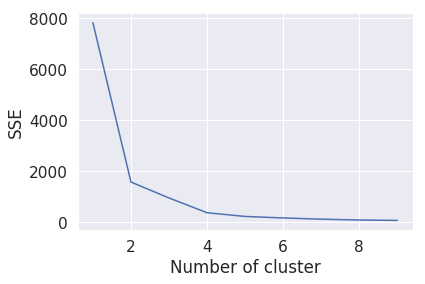

In [0]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = r.values+s.values+y.values
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
import matplotlib.pyplot as plt
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = TruncatedSVD(4)

text_trans_tr = clf.fit_transform(text_tfidf)
text_trans_te = clf.fit_transform(text_tfidf_te)
text_trans_cv = clf.fit_transform(text_tfidf_tecv)



###combining all the features

In [0]:
text_trans_cv.shape

(18299, 4)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,
                rne_normalized_te,p_normalized_rnppte,title_normalized_te,essay_normalized_te,ne_normalized_te,
                p_normalized_tnppte,school_state_one_hot_te,teacher_prefix_one_hot_te,
                project_grade_category_one_hot_te,price_normalized_te,text_trans_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test.shape

(36052, 115)

In [0]:
%time
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,rne_normalized,p_normalized_rnpp,
                 title_normalized,essay_normalized,ne_normalized,p_normalized_tnpp,school_state_one_hot,
                 project_grade_category_one_hot,teacher_prefix_one_hot,price_normalized,text_trans_tr)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


(73196, 115)

In [0]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,school_state_one_hot_tecv,
                   rne_normalized_tecv,p_normalized_rnpptecv,title_normalized_tecv,essay_normalized_tecv,ne_normalized_tecv,
                   p_normalized_tnpptecv,teacher_prefix_one_hot_tecv,project_grade_category_one_hot_tecv,
                   price_normalized_tecv,text_trans_cv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_cv.shape

(18299, 115)

In [0]:
print("Final Data matrix")
print(x_train.shape, Y_train.shape)
print(x_test_cv.shape, Y_test_cv.shape)
print(x_test.shape, Y_test.shape)

Final Data matrix
(73196, 115) (73196,)
(18299, 115) (18299,)
(36052, 115) (36052,)


In [0]:
C = [10 ** x for x in range(-8, 2)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(clf, method='sigmoid')
    clf_s.fit(x_train, Y_train)
    y_train_pred =  clf_s.predict_proba(x_train)[:,1]
    y_cv_pred =  clf_s.predict_proba(x_test_cv)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.5176005629088589 train: 0.5277383403019315
C 1e-07 cv: 0.5273596760349883 train: 0.5394568440725512
C 1e-06 cv: 0.5300238508511542 train: 0.5348571513704856
C 1e-05 cv: 0.5353275424277226 train: 0.5409471061523228
C 0.0001 cv: 0.5500068191629904 train: 0.5596787002312218
C 0.001 cv: 0.5633351682311721 train: 0.5736372484979368
C 0.01 cv: 0.555482505967414 train: 0.5606881259085591
C 0.1 cv: 0.5511453208530191 train: 0.5511613690188542
C 1 cv: 0.5510207847429772 train: 0.5509889586767897
C 10 cv: 0.5510159424555727 train: 0.5509874609974932


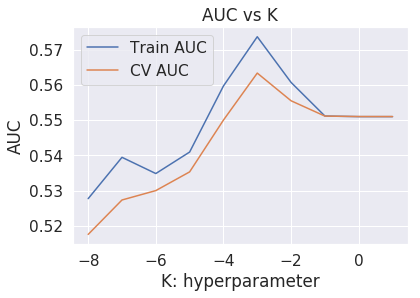

In [0]:
import math
log_a = [math.log10(num) for num in C]
plt.plot( log_a,train_auc, label='Train AUC')
plt.plot( log_a,cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC vs K")
plt.show()


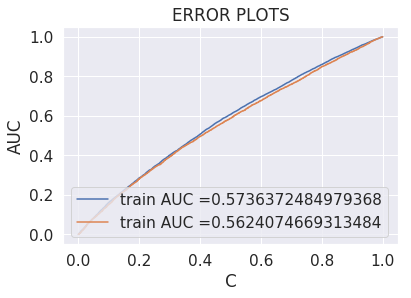

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=0.001, penalty='l2', loss='hinge',random_state = 0,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(x_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test)[:,1])
y_train_pred_new=clf_s.predict_proba(x_train)[:,1]
y_test_pred_new=clf_s.predict_proba(x_test)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

confusion matrix on test data


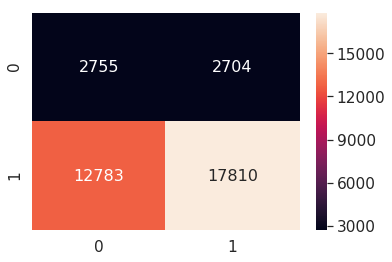

In [0]:
print("confusion matrix on test data")
a = confusion_matrix(Y_test, predict(y_test_pred_new, te_thresholds, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

   **2755+17810 = 20565  pouns are correctly classified**
**and 12783+2704 = 15487 points are wrongly classified**

confusion matrix on train data


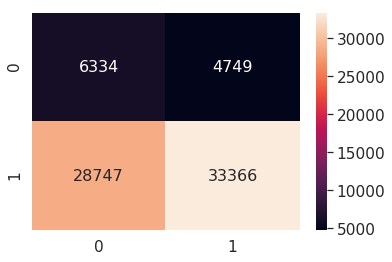

In [0]:
print("confusion matrix on train data")
a = confusion_matrix(Y_train, predict(y_train_pred_new, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **6334+33366 = 39700  pouns are correctly classified**
**and 28747+4749 =33496 points are wrongly classified**

###pettytable

In [339]:
# compare all your models using Prettytable library
#ref : http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model","penalty" ,"Best alpha", "Train_Auc","Test_Auc"]

x.add_row(["BOW", "svm(sgd classfier with hinge loss)","l1",5e-04,0.71,0.67])
x.add_row(["TF-IDf","svm(sgd classfier with hinge loss)","l1",1e-04,0.74,0.70])
x.add_row(["AVGW2V", "svm(sgd classfier with hinge loss)","l1",1e-05,0.69,0.67])
x.add_row(["TFIDFW2V", "svm(sgd classfier with hinge loss)","l1",1e-05,0.68,0.66])

x.add_row(["BOW", "svm(sgd classfier with hinge loss)","l2",1e-04,0.77,0.70])
x.add_row(["TF-IDf","svm(sgd classfier with hinge loss)","l2",1e-04,0.79,0.70])
x.add_row(["AVGW2V", "svm(sgd classfier with hinge loss)","l2",1e-04,0.66,0.64])
x.add_row(["TFIDFW2V", "svm(sgd classfier with hinge loss)","l2",1e-04,0.67,0.65])
x.add_row(["no text features set(set 5)","svm(sgd classfier with hinge loss)","l2",1e-04,0.51,0.50])
print(x)
print("--->From the above petty table, we can observe that we got the better auc when we used TFIDF with L2 penalty.")
print("--->In the case where we took only numerical features the auc we got is 0.5 .From that we can say that  the accuracy can be much better if we add text features also")
print("The best penalty in  l1 and l2 is :")
print("for BOW :l2 is better penalty than l1")
print("for TFIDF :l2 is better penalty than l1")
print("for Avg W2V :l2 and  l1 are performing almost same with l1 slightly better performance")
print("for TFIDF W2v :l2 and  l1 are performing almost same")





+-----------------------------+------------------------------------+---------+------------+-----------+----------+
|          Vectorizer         |               Model                | penalty | Best alpha | Train_Auc | Test_Auc |
+-----------------------------+------------------------------------+---------+------------+-----------+----------+
|             BOW             | svm(sgd classfier with hinge loss) |    l1   |   0.0005   |    0.71   |   0.67   |
|            TF-IDf           | svm(sgd classfier with hinge loss) |    l1   |   0.0001   |    0.74   |   0.7    |
|            AVGW2V           | svm(sgd classfier with hinge loss) |    l1   |   1e-05    |    0.69   |   0.67   |
|           TFIDFW2V          | svm(sgd classfier with hinge loss) |    l1   |   1e-05    |    0.68   |   0.66   |
|             BOW             | svm(sgd classfier with hinge loss) |    l2   |   0.0001   |    0.77   |   0.7    |
|            TF-IDf           | svm(sgd classfier with hinge loss) |    l2   |  

### <font color='blue'> Observations</font>

* Entire data set is considered
* The data was splitted into train and test in the ratio of 3:1
* The traindata is again splitted into  train cross valiadted and test cross validated data in the ratio of 4:1

### <font color='violet'> Bag Of words(penalty = l1)</font>

* Tha optimal alpha value is 0.0005
  
* From the confusion matrix,
 
* For Train Data,

   * 6928+43074 = 50002 points are correctly classified 
   * 19039+4155 =14194 points are wrongly classified


* For Test Data,

   * 2729+22800 = 25529 poinst are correctly classified
   * 7793+2730 =10523 points are wrongly classified




### <font color='violet'> Bag Of words(penalty = l2)</font>

* Tha optimal alpha value is 0.0001
  
* From the confusion matrix,
 
* For Train Data,
 
  * 8209+41894=50103 pouns are correctly classified
  * 20219+2874=23093 points are wrongly classified
  
* For Test Data,

 * 3358+20813=24171 poinst are correctly classified**
 * 9780+2101=11881points are wrongly classified**



### <font color='violet'> TFIDF(penalty l1)</font>
 

* The optimal alpha value is 0.0001
* From the confusion matrix,


 
* For Train Data,

   * 7623+42587 = 50210  pouns are correctly classified**
   * 19526+3460 = 22986 points are wrongly classified**
* For Test Data,

   * 2730+24229 =26959 pouns are correctly classified**
   * 6294+2729 =9023 points are wrongly classified**



### <font color='violet'> TFIDF(penalty l2)</font>
 

* The optimal alpha value is 0.0001
* From the confusion matrix,

* For Train Data,
         * 7894+45340 = 53234 points are correctly classified
         * 16773+3189 = 19962  points are wrongly classified


* For Test Data,

    * 2729+23990 = 26719 pouns are correctly classified**
    * 6603+23990 = 9333 points are wrongly classified**






### <font color='violet'> Weighted W2V(penalty l1)</font>

* Tha optimal alpha value is 1e-05
  
* From the confusion matrix,
 
* For Train Data,

   * 7571+37065 = 44636   pouns are correctly classified**
   * 25048+3512 = 28560  points are wrongly classified**

* For Test Data,

   * 2729+22766 = 25495  pouns are correctly classified**
   * 7827+2730 =10557   points are wrongly classified**



### <font color='violet'> Weighted W2V(penalty l2)</font>

* Tha optimal alpha value is 1e-04
  
* From the confusion matrix,
 
* For Train Data,
 
   * 6941+41179 =48120 pouns are correctly classified**
   * 20934+4142 =25076 points are wrongly classified**



* For Test Data

   * 3417+19268 =22685 pouns are correctly classified**
   * 11325+2042 =13367  points are wrongly classified**


### <font color='violet'> TFIDF Weighted W2V(penalty l1)</font>
 

* The optimal alpha value is 1e-05
* From the confusion matrix,
 
* For Train Data,

   * 7171+38796 = 45967   pouns are correctly classified**
   * 23317+3912 =27229 points are wrongly classified**

* For Test Data,

  * 3381+18776 =22517  pouns are wrongly  classified**
  *  11817+2078 =13895 points arecorrectly  classified**





### <font color='violet'> TFIDF Weighted W2V(penalty l2)</font>
 

* The optimal alpha value is 0.0001
* From the confusion matrix,
 
* For Train Data,

   * 7051+37738 = 44789  pouns are correctly classified**
   * 24375+4032 =28407  points are wrongly classified**

* For Test Data,

  *  3385+18112 =21497  pouns are correctly classified**
  *  12481+2074 =14555  points are wrongly classified**





  ### <font color='violet'> No text  Features</font>

* Tha optimal alpha value is 0.0001
* From the confusion matrix,
 
* For Train Data,

   * 6334+33366 = 39700  pouns are correctly classified**
   * 28747+4749 =33496  points are wrongly classified**


* For Test Data,

   * 2755+17810 = 20565   pouns are correctly classified**
   *  12783+2704 = 15487 points are wrongly classified**







**The No text  set  has numerical features and categorical features and for the text features,we have calculated the sentiment scores. so this set doesnt contain any text features.From the svm(using hinge loss) on this set we got train and test auc of 0.51 and 0.5 .So  we can infer that when text features are used the model performance will be much better.**
















My GitHub Link:
https://github.com/bharathpreetham